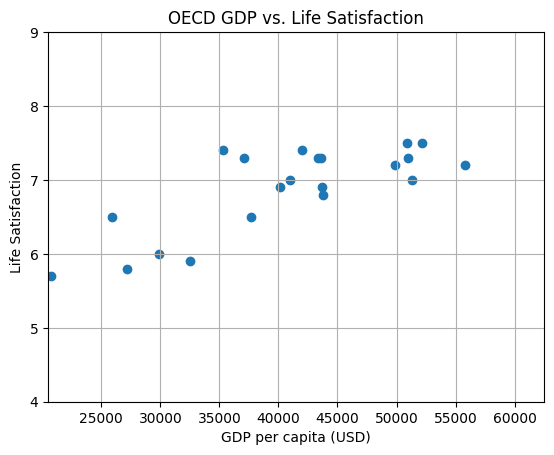

[[6.63577712]]


C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [124]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load and clean GDP data
gdp = pd.read_csv('dataset/gdp_per_capita.csv', 
                  thousands=',', delimiter='\t', 
                  encoding='latin1', na_values="n/a", 
                  index_col="Country")

# Load and clean OECD data
oecd = pd.read_csv('dataset/oecd_bli_2015.csv')
oecd = oecd[oecd["INEQUALITY"]=="TOT"]  # only total values
oecd = oecd.pivot(index="Country", columns="Indicator", values="Value")

# Join both datasets on country name
full_data = pd.merge(left=oecd, right=gdp, left_index=True, right_index=True)
full_data = full_data[["Life satisfaction", "2015"]]  # keep only required cols
full_data = full_data.dropna()  # ensure no NaNs

# Separate X and y
X = full_data[["2015"]]  # GDP
y = full_data[["Life satisfaction"]]  # Life satisfaction

# Plotting
plt.scatter(X, y)
plt.axis([20_500, 62_500, 4, 9])
plt.grid(True)
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Life Satisfaction")
plt.title("OECD GDP vs. Life Satisfaction")
plt.show()

# Train linear model
model = LinearRegression()
model.fit(X, y)

# Predict
X_new = [[37_655.2]]  # Cyprus GDP
print(model.predict(X_new))


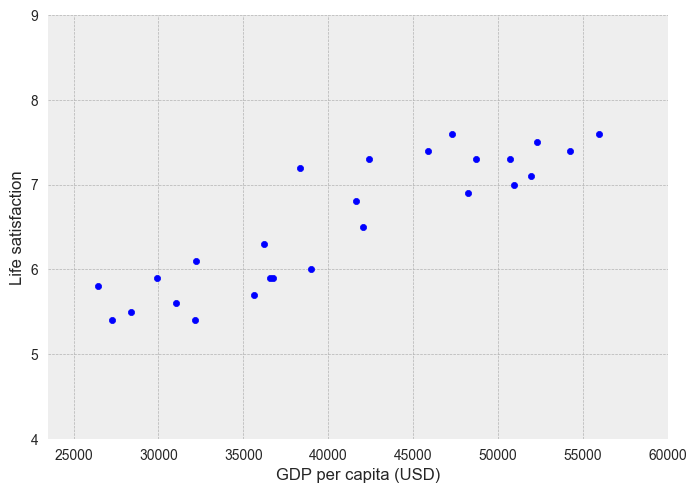

[[6.33333333]]


In [88]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

#importing dataset
lifesat = pd.read_csv(r'dataset/lifesat.csv',index_col='Country')

#seprate X and y
X = lifesat[['GDP per capita (USD)']].values
y = lifesat[['Life satisfaction']].values

#ploting graph
lifesat.plot(kind='scatter',x='GDP per capita (USD)',y='Life satisfaction',grid=True)
plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life satisfaction')
plt.axis([23_500,60_000,4,9])
plt.style.use('bmh')
plt.show()

#training the model
model=KNeighborsRegressor(n_neighbors=3)
model.fit(X,y)

#predict
X_new = [[37_655.2]]  # Cyprus GDP
print(model.predict(X_new))

### The graph shows the liner regression

A simple linear model\
life_satisfaction = θ₀ + θ₁ × GDP_per_capita

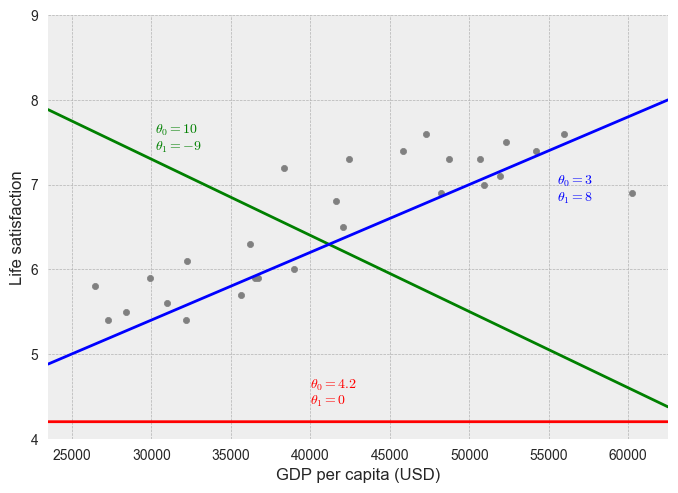

In [45]:
import numpy as np

#data points
lifesat.plot(kind='scatter',x='GDP per capita (USD)',y='Life satisfaction',grid=True,color='grey')

#linermodel plot
min_gdp , max_gdp = 23_500 , 62_500
X = np.linspace(min_gdp,max_gdp,3000)

w0,w1=4.2,0
plt.plot(X, w0 + w1 * 1e-5 * X, color='red')
plt.text(40_000, 4.6, fr"$\theta_0 = {w0}$", color="r")
plt.text(40_000, 4.4, fr"$\theta_1 = {w1}$", color="r")

w0,w1 = 10,-9
plt.plot(X, w0 + w1 * 1e-5 * X, color='green')
plt.text(30_200, 7.6, fr"$\theta_0 = {w0}$", color="g")
plt.text(30_200, 7.4, fr"$\theta_1 = {w1}$", color="g")

w0,w1 =3 ,8
plt.plot(X, w0 + w1 * 1e-5 * X, color='blue')
plt.text(55_500, 7.0, fr"$\theta_0 = {w0}$", color="blue")
plt.text(55_500, 6.8, fr"$\theta_1 = {w1}$", color="blue")

plt.axis([min_gdp,max_gdp,4,9])
plt.show()

### liner regrasion vaiable 
life_staisfaction = t0 + t1* gdp

In [54]:
from sklearn import linear_model

x_sample = lifesat[['GDP per capita (USD)']].values
y_sample = lifesat[['Life satisfaction']].values

#train model
ln1=linear_model.LinearRegression()
ln1.fit(x_sample,y_sample)

t0 ,t1 = ln1.intercept_[0],ln1.coef_.ravel()[0]
print(f'θ₀={t0:.2f},θ₁={t1:.2e}')

θ₀=3.75,θ₁=6.78e-05


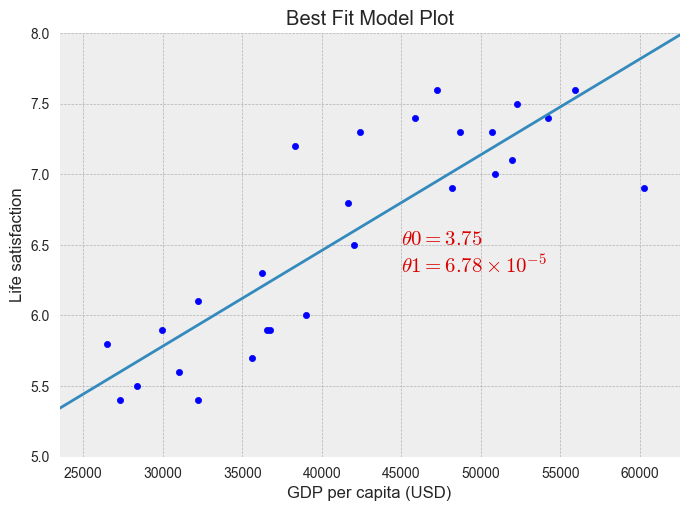

In [87]:
lifesat.plot(kind='scatter',x='GDP per capita (USD)',y='Life satisfaction',grid=True)

#ploting linear regression for t0 and t1
x= np.linspace(min_gdp,max_gdp,3000)
plt.plot(x , t0 + t1 * x)
plt.text(45_000,6.5,fr"$\theta0 ={t0:.2f}$" ,fontsize=15, color="#da0000")
plt.text(45_000,6.3 ,fr"$\theta1 = {t1 * 1e5:.2f} \times 10^{{-5}}$",fontsize=15, color="#da0000", fontweight='bold')

plt.title('Best Fit Model Plot')
plt.axis([min_gdp,max_gdp,5,8])
plt.show()

In [98]:
poland_gdp=lifesat.loc['Poland','GDP per capita (USD)']
poland_gdp

32238.157259275